In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import json
from scipy import stats
import os

# Preprocessing Movie

In [26]:
movies_column_names = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date','Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None,names=movies_column_names, decimal='.' )
movies.Movie_release_date = pd.to_datetime(movies.Movie_release_date,format='mixed', errors='coerce', utc=True)

movies

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16 00:00:00+00:00,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01 00:00:00+00:00,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19 00:00:00+00:00,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21 00:00:00+00:00,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22 00:00:00+00:00,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21 00:00:00+00:00,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


# Preprocessing TV tropes


In [27]:
tvtropes = pd.read_csv('data/tvtropes.clusters.txt', sep="\t", quoting = 3, header = None, on_bad_lines='skip')
tvtropes.columns = ["Role", "data"]
parsed_data = tvtropes["data"].apply(lambda x: pd.Series(json.loads(x)))
tvtropes = pd.concat([tvtropes["Role"], parsed_data], axis=1)
tvtropes = tvtropes.rename(columns={'char': 'Character_name', 'movie': 'Movie_name','id':'Freebase_character/actor_map_ID','actor':'Actor_name'})

tvtropes.role = tvtropes.Role.str.replace('_', ' ')
tvtropes.head()

C:\Users\mirco\AppData\Local\Temp\ipykernel_15292\3019440791.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tvtropes.role = tvtropes.Role.str.replace('_', ' ')


,Role,Character_name,Movie_name,Freebase_character/actor_map_ID,Actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


Text(0.5, 1.0, 'Number of characters per role')

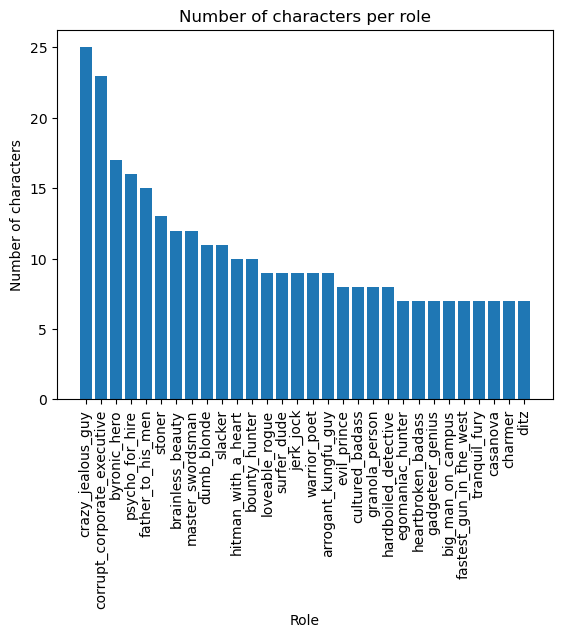

In [28]:
plt.bar( tvtropes.Role.value_counts().index[:30], tvtropes.Role.value_counts()[:30])
plt.xticks(rotation ='vertical',fontsize=10)
plt.ylabel("Number of characters")
plt.xlabel("Role")
plt.title("Number of characters per role")


Text(0.5, 1.0, 'Number of character appearances in the same role')

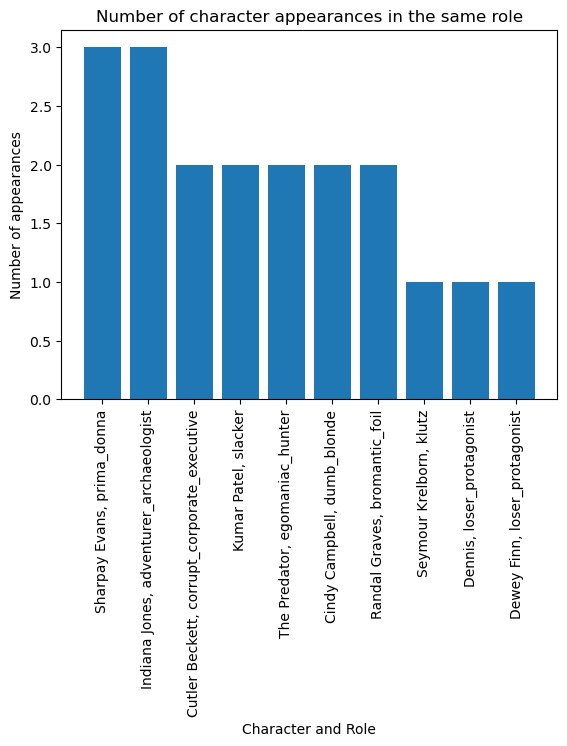

In [ ]:
unique_character = tvtropes.drop(['Freebase_character/actor_map_ID','Actor_name','Movie_name'], axis = 1).value_counts()
unique_character = pd.DataFrame(unique_character)
unique_character.reset_index(inplace=True)
#.Role()+ unique_character.Character_name(), unique_character)
plt.bar(unique_character.Character_name[:10]+', '+unique_character.Role[:10], unique_character["count"][:10])
plt.xticks(rotation ='vertical',fontsize=10)
plt.ylabel("Number of appearances")
plt.xlabel("Character and Role")
plt.title("Number of character appearances in the same role")


# Plot summaries

In [ ]:
summaries = pd.read_csv('data/plot_summaries.txt', sep="\t", quoting = 3, header = None, on_bad_lines='skip')
summaries.columns = ["Wikipedia_movie_ID", "Plot"]
summaries

,Wikipedia_movie_ID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42301,34808485,"The story is about Reema , a young Muslim scho..."
42302,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42303,35102018,American Luthier focuses on Randy Parsons’ tra...
42304,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [47]:
movies = pd.merge(left=movies, right=summaries, on='Wikipedia_movie_ID')
movies

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."
...,...,...,...,...,...,...,...,...,...,...
42202,23851782,/m/06_vb43,The Ghost Train,1941-05-03 00:00:00+00:00,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",{{plot}} The film opens with a Great Western e...
42203,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19 00:00:00+00:00,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...
42204,34980460,/m/0g4pl34,Knuckle,2011-01-21 00:00:00+00:00,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...
42205,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21 00:00:00+00:00,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup..."
